In [51]:
import pandas as pd
import matplotlib.pyplot as plt

In [52]:
#https://www.kaggle.com/datasets/vishakhdapat/customer-segmentation-clustering
data = pd.read_csv('customer_segmentation.csv')
data.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [53]:
for i in range(1, 6):
    print(i, data['AcceptedCmp' + str(i)].mean())

1 0.06428571428571428
2 0.013392857142857142
3 0.07276785714285715
4 0.07455357142857143
5 0.07276785714285715


In [54]:
import time
from datetime import datetime

data_transformed = data.copy().drop(columns=["Z_CostContact", "Z_Revenue", "ID"])
min_year = min(data_transformed['Year_Birth'])
data_transformed['Year_Birth'] = [elem - min_year for elem in data_transformed['Year_Birth']]
data_transformed['Dt_Customer'] = [datetime.timestamp(datetime.strptime(elem,"%d-%m-%Y")) for elem in data['Dt_Customer']]
data_transformed = pd.get_dummies(data_transformed,columns=['Education', 'Marital_Status', 'Kidhome', 'Teenhome']).dropna()

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

X = data_transformed.drop(columns=['AcceptedCmp' + str(i) for i in range(1, 6)])
Y = data_transformed[['AcceptedCmp' + str(i) for i in range(1, 6)]]

clf1 = LogisticRegression()
cv = cross_validate(clf1, X, Y['AcceptedCmp1'], cv=4, return_estimator=True)

In [56]:
cv['test_score']

array([0.9368231 , 0.9368231 , 0.93140794, 0.92960289])

In [57]:
clf1 = LogisticRegression().fit(X, Y['AcceptedCmp1'])
list(clf1.coef_[0])

[-1.3029589461708847e-09,
 5.519750923855609e-05,
 -4.447238918185373e-09,
 -5.13855517964319e-09,
 9.37531288038262e-07,
 6.039833592745917e-08,
 5.563017884310275e-07,
 1.1343534953547218e-07,
 7.971007425864115e-08,
 6.934370524388823e-08,
 -1.988225487243918e-09,
 3.417320550881539e-09,
 7.1611257515359346e-09,
 4.56861614137952e-09,
 -3.827693543760163e-09,
 -1.9986374763636912e-11,
 8.398091779997535e-10,
 1.6747439076972095e-11,
 -5.144481180327357e-11,
 1.209534414350952e-10,
 -7.898268549604967e-11,
 -1.215814423970003e-11,
 1.2772744402148287e-11,
 -2.751891602202613e-12,
 -4.2686951070418765e-11,
 1.0242894563124502e-10,
 -3.714026340421728e-12,
 -7.054568865267097e-11,
 1.574632451881776e-12,
 -1.962525846516631e-12,
 7.254822882636919e-10,
 -7.168331282503956e-10,
 -1.3533921040251233e-11,
 5.918539409137524e-10,
 -5.634218451335938e-10,
 -3.3316856807114796e-11]

In [58]:
from math import exp
string = f"Intercept: {exp(clf1.intercept_)}\n"
columns = list(X.columns)
coef = list(clf1.coef_[0])
for i in range(len(columns)):
    string += f"{columns[i]}: {exp(coef[i])}\n"
print(string[:-1])

Intercept: 0.9999999999951152
Year_Birth: 0.999999998697041
Income: 1.0000551990326492
Dt_Customer: 0.9999999955527611
Recency: 0.9999999948614449
MntWines: 1.0000009375317276
MntFruits: 1.0000000603983377
MntMeatProducts: 1.0000005563019432
MntFishProducts: 1.000000113435356
MntSweetProducts: 1.0000000797100774
MntGoldProds: 1.0000000693437077
NumDealsPurchases: 0.9999999980117745
NumWebPurchases: 1.0000000034173206
NumCatalogPurchases: 1.0000000071611257
NumStorePurchases: 1.0000000045686162
NumWebVisitsMonth: 0.9999999961723065
Complain: 0.9999999999800137
Response: 1.0000000008398091
Education_2n Cycle: 1.0000000000167475
Education_Basic: 0.9999999999485552
Education_Graduation: 1.0000000001209535
Education_Master: 0.9999999999210173
Education_PhD: 0.9999999999878418
Marital_Status_Absurd: 1.0000000000127727
Marital_Status_Alone: 0.9999999999972481
Marital_Status_Divorced: 0.999999999957313
Marital_Status_Married: 1.000000000102429
Marital_Status_Single: 0.999999999996286
Marital_S

In [59]:
from statsmodels.api import Logit
model = Logit(Y['AcceptedCmp1'], X).fit(method='bfgs')
print(model.summary())

         Current function value: 0.693147
         Iterations: 0
         Function evaluations: 15
         Gradient evaluations: 3
                           Logit Regression Results                           
Dep. Variable:           AcceptedCmp1   No. Observations:                 2216
Model:                          Logit   Df Residuals:                     2183
Method:                           MLE   Df Model:                           32
Date:                Mon, 22 Jan 2024   Pseudo R-squ.:                  -1.912
Time:                        14:57:58   Log-Likelihood:                -1536.0
converged:                      False   LL-Null:                       -527.51
Covariance Type:            nonrobust   LLR p-value:                     1.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Year_Birth                       0        nan       

/Users/tannergiddings/opt/anaconda3/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/tannergiddings/opt/anaconda3/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Users/tannergiddings/opt/anaconda3/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/tannergiddings/opt/anaconda3/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Users/tannergiddings/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian fail

In [60]:
#X[['Year_Birth', 'Income']].corr()['Year_Birth']['Income']
columns = list(X.columns)
for i in range(len(columns) - 1):
    for j in range(i+1, len(columns)):
        print(f"{columns[i]}, {columns[j]} : {X[[columns[i], columns[j]]].corr()[columns[i]][columns[j]]}")

Year_Birth, Income : -0.16179142819632966
Year_Birth, Dt_Customer : -0.020303972939870046
Year_Birth, Recency : -0.016294899725588775
Year_Birth, MntWines : -0.15945109606670801
Year_Birth, MntFruits : -0.017746520210085447
Year_Birth, MntMeatProducts : -0.03369674544450869
Year_Birth, MntFishProducts : -0.04042508416794429
Year_Birth, MntSweetProducts : -0.02020441495744577
Year_Birth, MntGoldProds : -0.06420769327026428
Year_Birth, NumDealsPurchases : -0.05866805087264463
Year_Birth, NumWebPurchases : -0.15305137476702102
Year_Birth, NumCatalogPurchases : -0.12176397201297945
Year_Birth, NumStorePurchases : -0.12789072181374894
Year_Birth, NumWebVisitsMonth : 0.12390393683196435
Year_Birth, Complain : -0.030407246701888456
Year_Birth, Response : 0.02369211986428431
Year_Birth, Education_2n Cycle : 0.08436473221993594
Year_Birth, Education_Basic : 0.11398603019085529
Year_Birth, Education_Graduation : 0.0685742823201735
Year_Birth, Education_Master : -0.069389505238113
Year_Birth, Edu

MntFruits, Response : 0.12244267882212097
MntFruits, Education_2n Cycle : 0.023781771690091567
MntFruits, Education_Basic : -0.060558619124716266
MntFruits, Education_Graduation : 0.11405598128121817
MntFruits, Education_Master : -0.05559238730306517
MntFruits, Education_PhD : -0.08219243876897957
MntFruits, Marital_Status_Absurd : 0.043925030615600796
MntFruits, Marital_Status_Alone : -0.02068932211569493
MntFruits, Marital_Status_Divorced : 0.009202652942923674
MntFruits, Marital_Status_Married : -0.014117199736337844
MntFruits, Marital_Status_Single : 0.011819263705161603
MntFruits, Marital_Status_Together : -0.012693883672331681
MntFruits, Marital_Status_Widow : 0.026110784647406144
MntFruits, Marital_Status_YOLO : -0.01764439846928254
MntFruits, Kidhome_0 : 0.3844889138865097
MntFruits, Kidhome_1 : -0.3658170667681994
MntFruits, Kidhome_2 : -0.07433532143035303
MntFruits, Teenhome_0 : 0.18194811935168445
MntFruits, Teenhome_1 : -0.172124177583673
MntFruits, Teenhome_2 : -0.0342781

Education_Graduation, Marital_Status_Widow : -0.016238845556139095
Education_Graduation, Marital_Status_YOLO : -0.030273451935510176
Education_Graduation, Kidhome_0 : 0.0015871664613327395
Education_Graduation, Kidhome_1 : -0.0012934714653183145
Education_Graduation, Kidhome_2 : -0.0010512611038556209
Education_Graduation, Teenhome_0 : 0.02051722974867911
Education_Graduation, Teenhome_1 : -0.013900246736508736
Education_Graduation, Teenhome_2 : -0.02217484116707344
Education_Master, Education_PhD : -0.23381158257782117
Education_Master, Marital_Status_Absurd : 0.027168481261981303
Education_Master, Marital_Status_Alone : 0.01673804135975026
Education_Master, Marital_Status_Divorced : -0.004820197092523803
Education_Master, Marital_Status_Married : -0.007887912656464295
Education_Master, Marital_Status_Single : -0.007669347636162952
Education_Master, Marital_Status_Together : 0.021174188210997893
Education_Master, Marital_Status_Widow : -0.010148285174059262
Education_Master, Marital_S

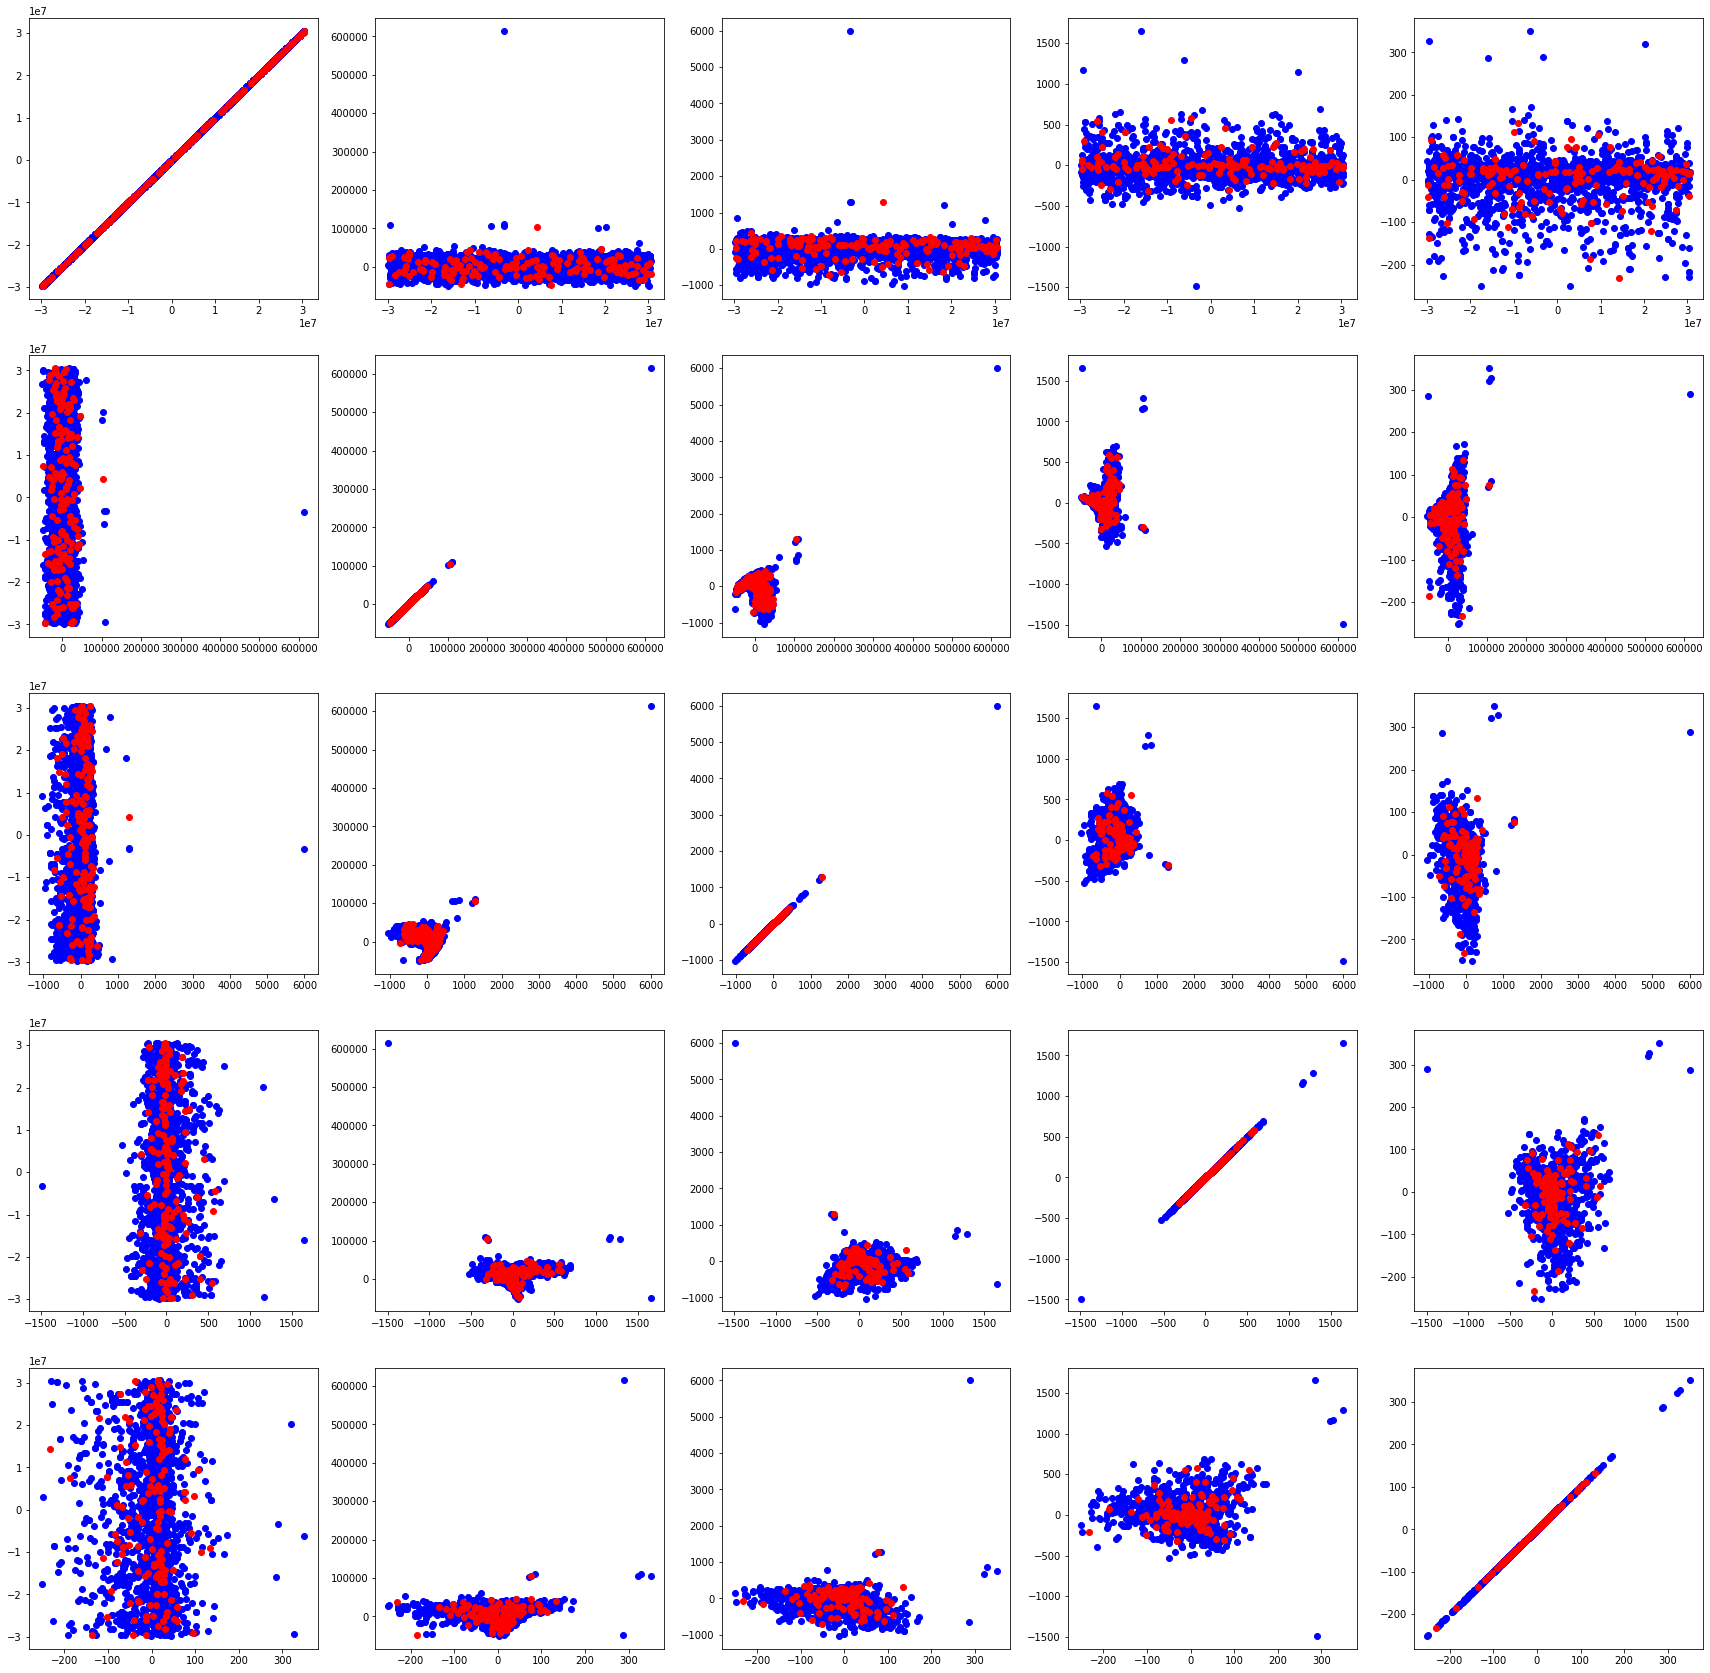

In [61]:
from sklearn.decomposition import PCA
values = PCA(n_components=5).fit_transform(X)
pca_df = pd.DataFrame({"PCA" + str(i+1) : values.T[i] for i in range(5)})
pca_df['Y'] = Y['AcceptedCmp5']
fig, axs = plt.subplots(5,5, figsize = (30, 30))
for i in range(0, 5):
    for j in range(0, 5):
        axs[i][j].scatter(pca_df[pca_df['Y'] == 0]['PCA' + str(i+1)], pca_df[pca_df['Y'] == 0]['PCA' + str(j+1)], color='blue')
        axs[i][j].scatter(pca_df[pca_df['Y'] == 1]['PCA' + str(i+1)], pca_df[pca_df['Y'] == 1]['PCA' + str(j+1)], color='red')
plt.show()

In [62]:
from sklearn.manifold import TSNE
values = TSNE(n_components=2).fit_transform(X)
values.T[0]

/Users/tannergiddings/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/tannergiddings/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


array([ 40.398445 ,   9.881911 , -28.701712 , ..., -12.717109 ,
       -13.2635975,  51.602036 ], dtype=float32)

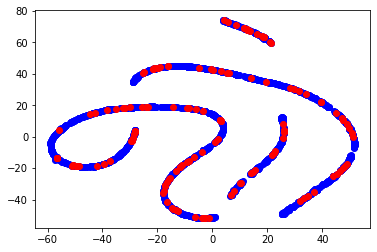

In [63]:
tsne_df = pd.DataFrame({"TSNE1" : values.T[0], "TSNE2" : values.T[1], "Y" : Y['AcceptedCmp1']})
plt.scatter(tsne_df[tsne_df['Y'] == 0]['TSNE1'], tsne_df[tsne_df['Y'] == 0]['TSNE2'], color='blue')
plt.scatter(tsne_df[tsne_df['Y'] == 1]['TSNE1'], tsne_df[tsne_df['Y'] == 1]['TSNE2'], color='red')

In [64]:
from sklearn.svm import SVC

sum(SVC().fit(X, Y['AcceptedCmp1']).predict(X))

0

In [65]:
def or_list(L):
    for elem in L:
        if elem == 1:
            return True
    return False

from statistics import mean
mean([or_list(elem) for elem in Y])

0

In [66]:
total_Y = (Y['AcceptedCmp1'] + Y['AcceptedCmp2'] + Y['AcceptedCmp3'] + Y['AcceptedCmp4'] + Y['AcceptedCmp5']) > 0

In [67]:
model = Logit(total_Y, X).fit(method='bfgs')
print(model.summary())

         Current function value: 0.693147
         Iterations: 0
         Function evaluations: 15
         Gradient evaluations: 3
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 2216
Model:                          Logit   Df Residuals:                     2183
Method:                           MLE   Df Model:                           32
Date:                Mon, 22 Jan 2024   Pseudo R-squ.:                 -0.3588
Time:                        14:58:09   Log-Likelihood:                -1536.0
converged:                      False   LL-Null:                       -1130.4
Covariance Type:            nonrobust   LLR p-value:                     1.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Year_Birth                       0        nan       

/Users/tannergiddings/opt/anaconda3/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/tannergiddings/opt/anaconda3/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Users/tannergiddings/opt/anaconda3/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/tannergiddings/opt/anaconda3/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Users/tannergiddings/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian fail

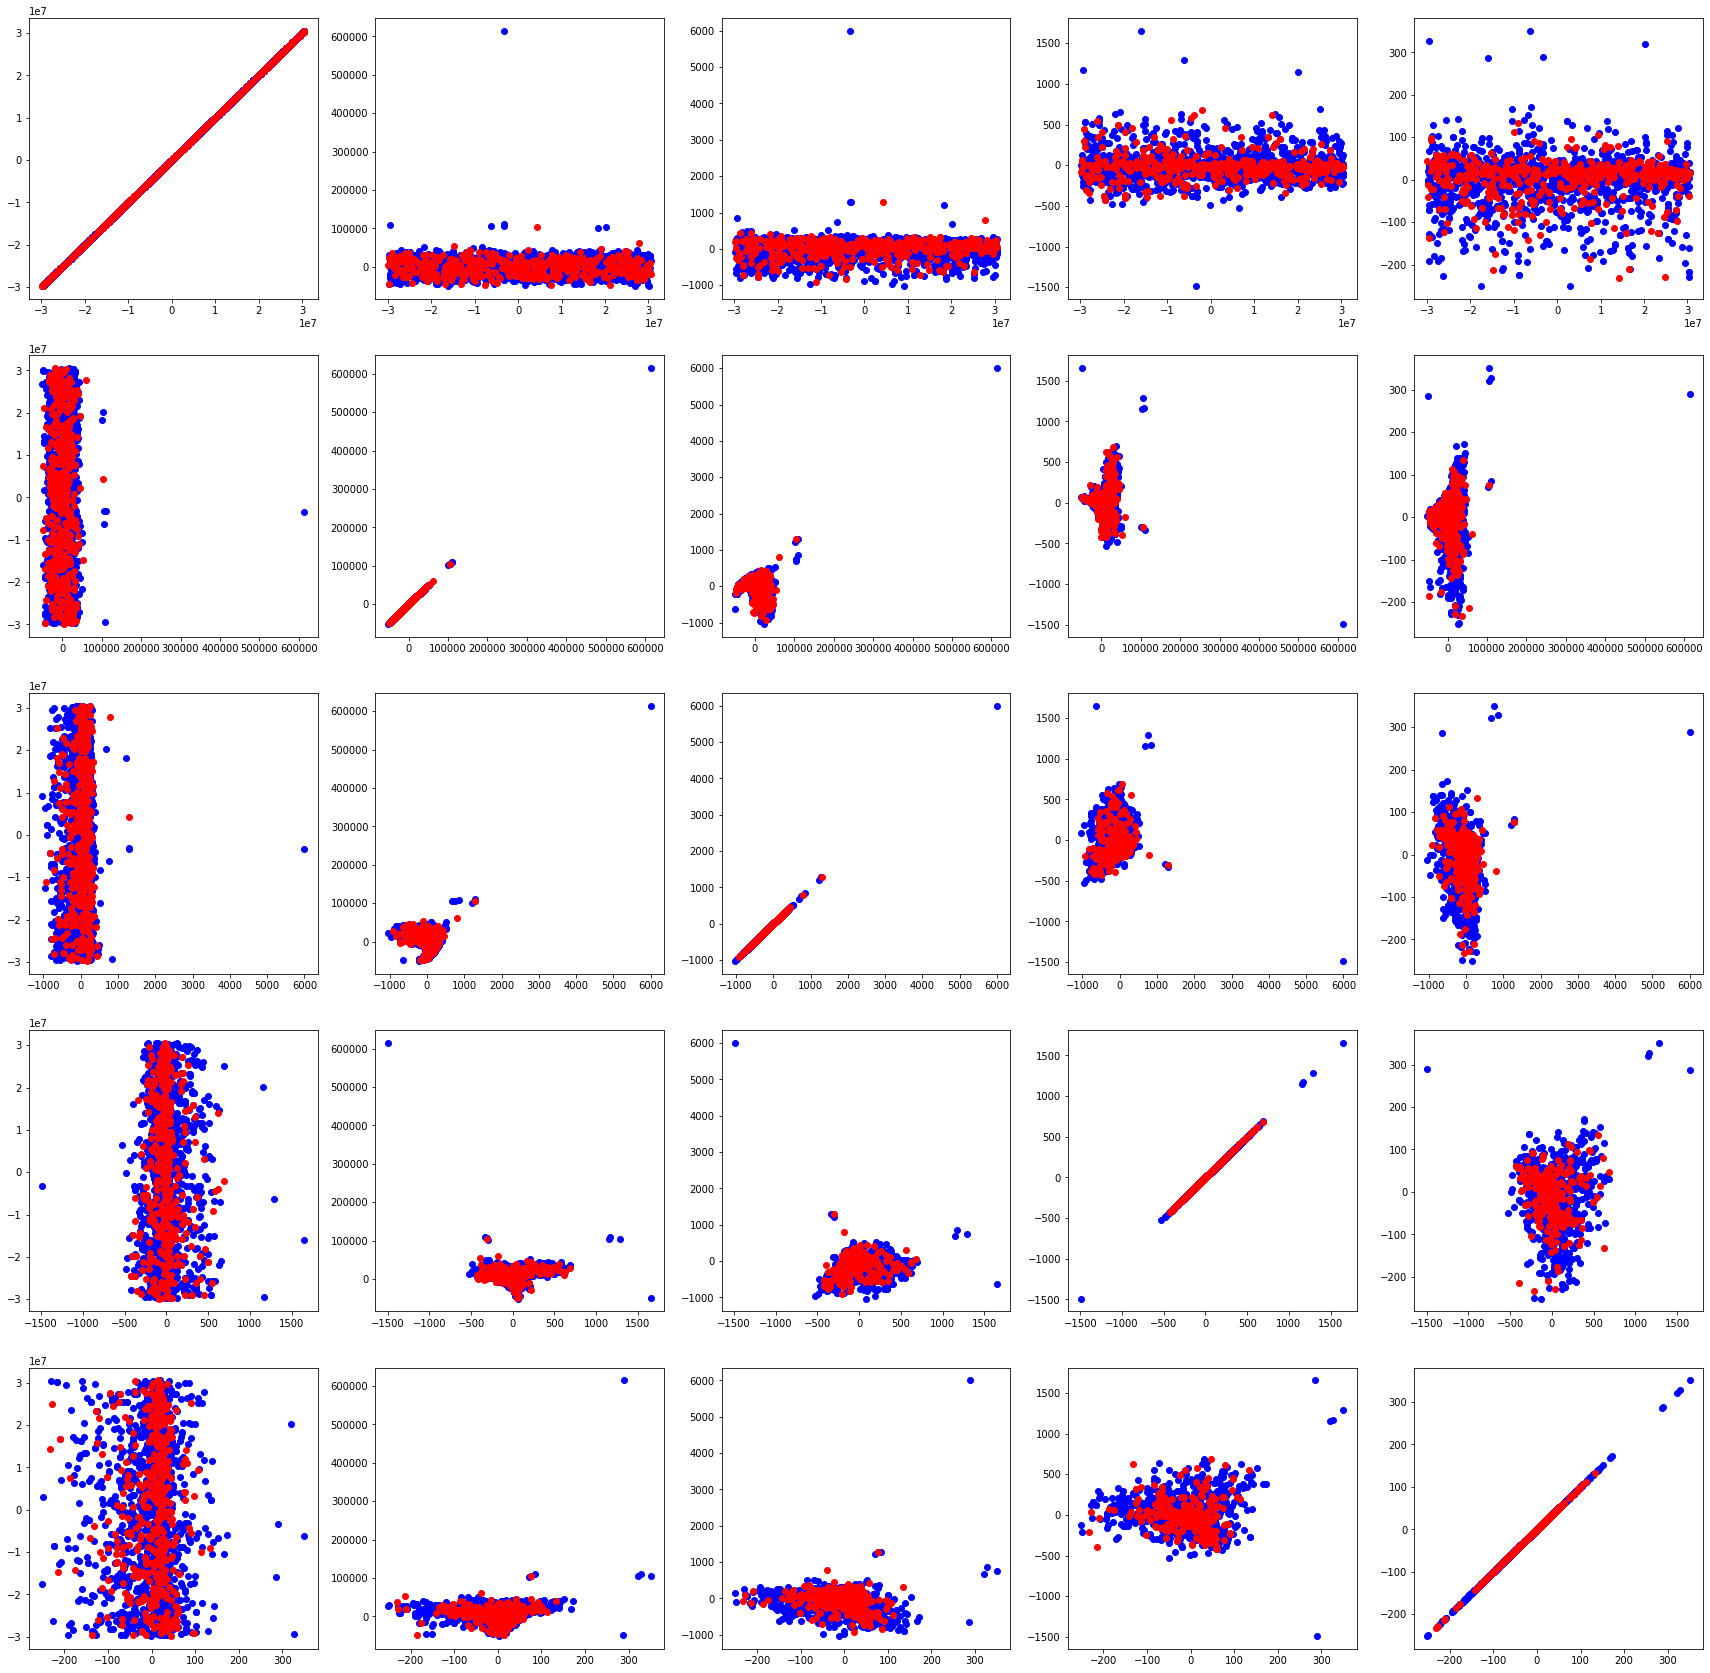

In [68]:
from sklearn.decomposition import PCA
values = PCA(n_components=5).fit_transform(X)
pca_df = pd.DataFrame({"PCA" + str(i+1) : values.T[i] for i in range(5)})
pca_df['Y'] = total_Y
fig, axs = plt.subplots(5,5, figsize = (30, 30))
for i in range(0, 5):
    for j in range(0, 5):
        axs[i][j].scatter(pca_df[pca_df['Y'] == 0]['PCA' + str(i+1)], pca_df[pca_df['Y'] == 0]['PCA' + str(j+1)], color='blue')
        axs[i][j].scatter(pca_df[pca_df['Y'] == 1]['PCA' + str(i+1)], pca_df[pca_df['Y'] == 1]['PCA' + str(j+1)], color='red')
plt.show()

/Users/tannergiddings/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/tannergiddings/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


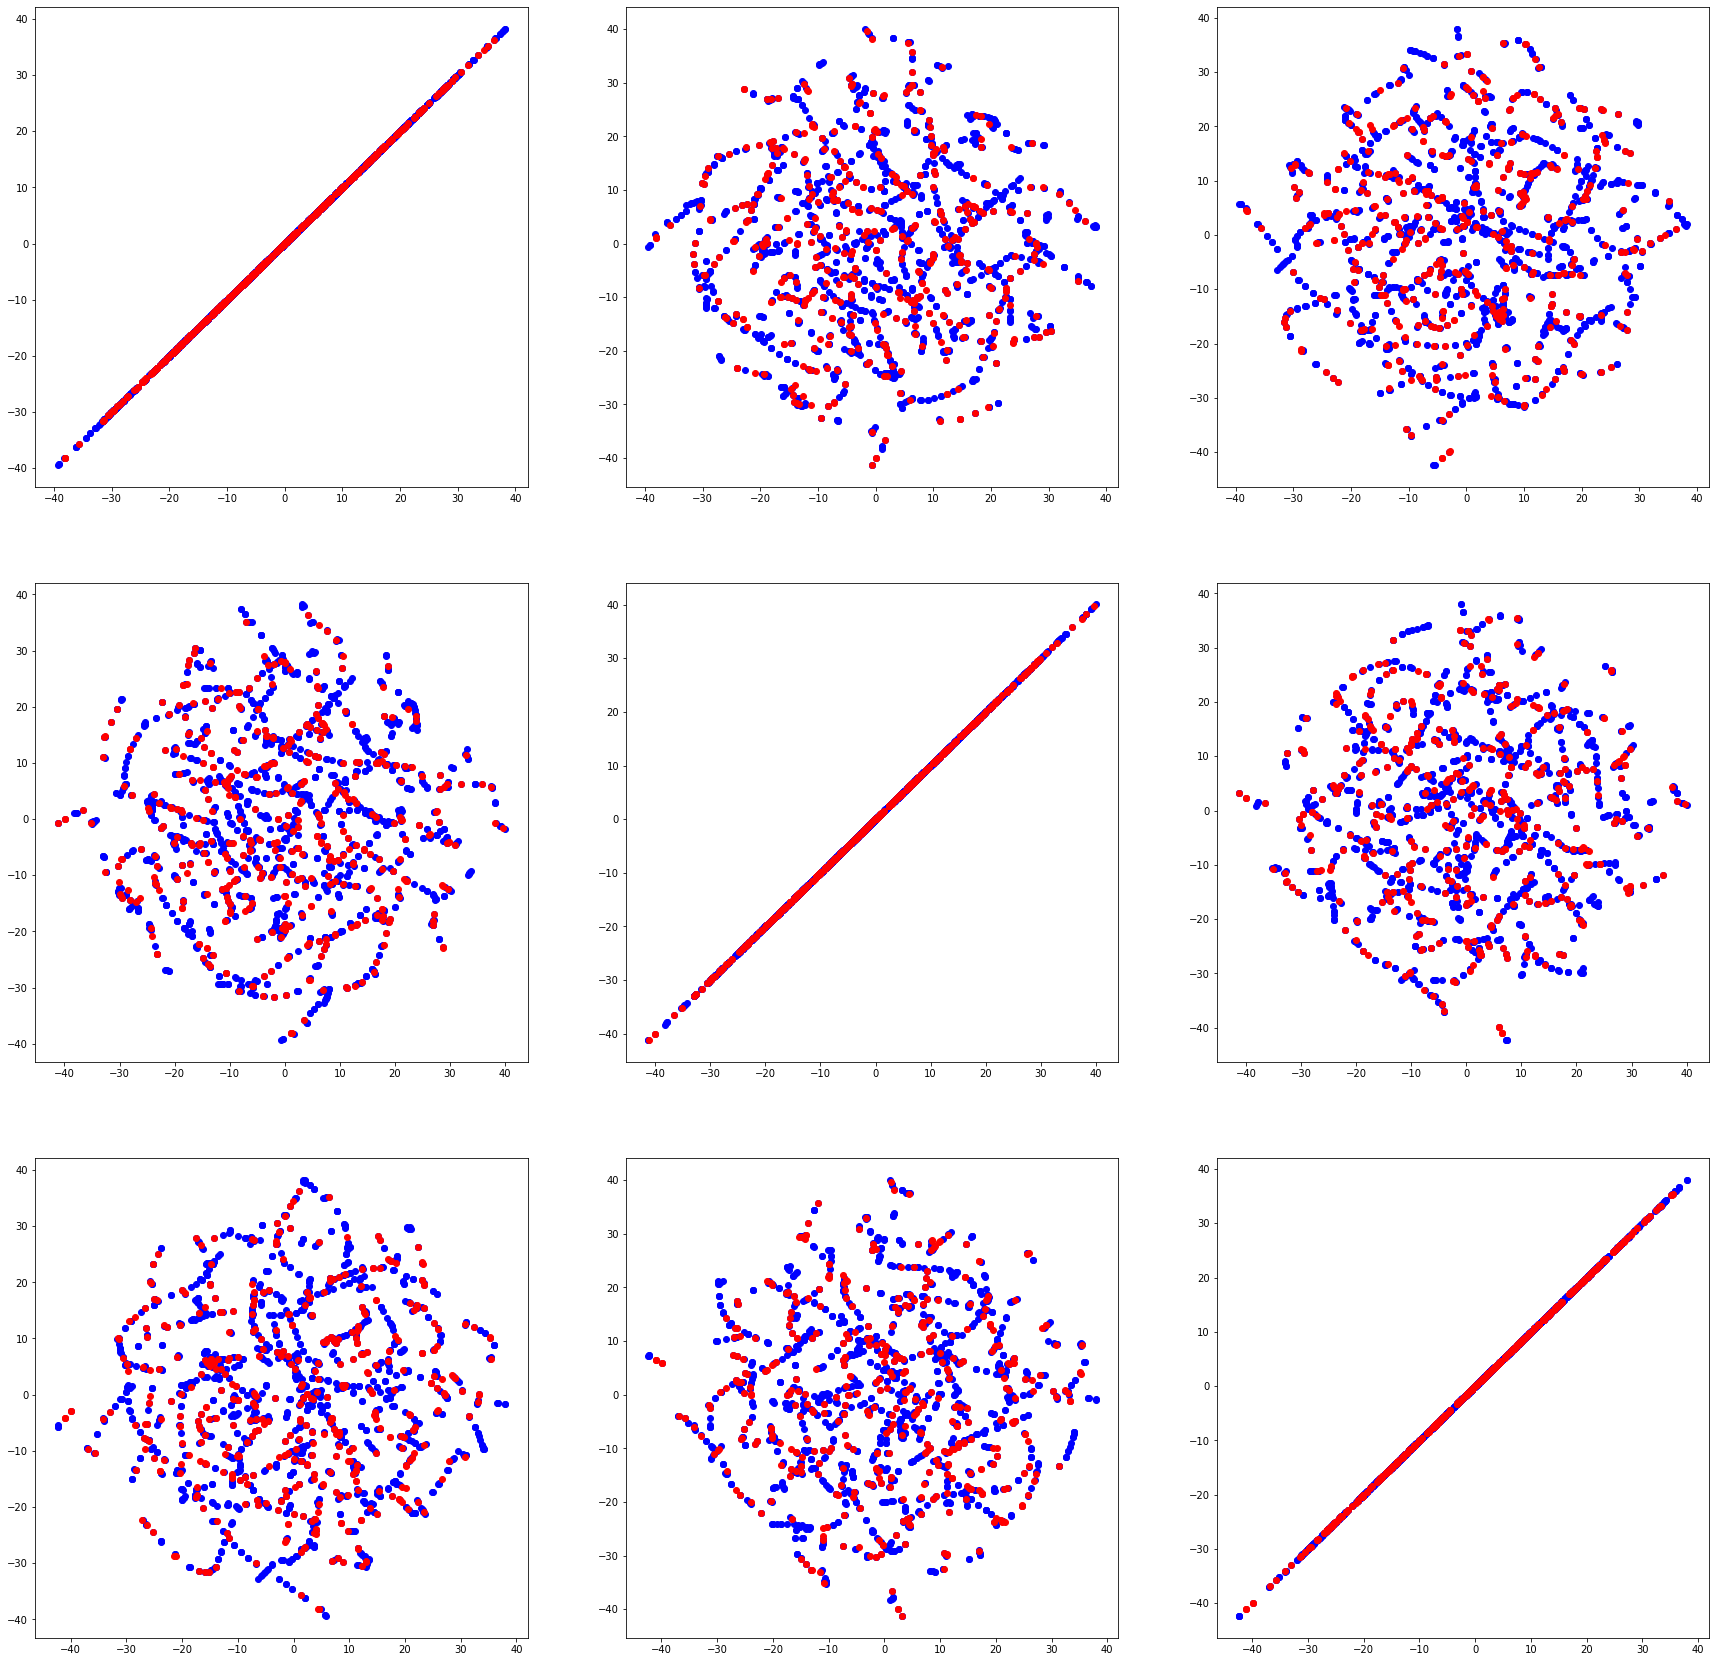

In [69]:
values = TSNE(n_components=3, perplexity=5).fit_transform(X)
tsne_df = pd.DataFrame({"TSNE" + str(i+1) : values.T[i] for i in range(3)})
tsne_df['Y'] = total_Y
fig, axs = plt.subplots(3,3, figsize = (30, 30))
for i in range(0, 3):
    for j in range(0, 3):
        axs[i][j].scatter(tsne_df[tsne_df['Y'] == 0]['TSNE' + str(i+1)], tsne_df[tsne_df['Y'] == 0]['TSNE' + str(j+1)], color='blue')
        axs[i][j].scatter(tsne_df[tsne_df['Y'] == 1]['TSNE' + str(i+1)], tsne_df[tsne_df['Y'] == 1]['TSNE' + str(j+1)], color='red')
plt.show()

              PCA0          PCA1        PCA2        PCA3        PCA4  \
0    -2.674021e+07   6607.559643 -296.588483  245.602781  -71.274338   
1     2.078338e+07  -6459.820607  203.747692  -40.527834   20.006344   
2     3.586185e+06  19270.162013   61.302035 -114.968161  -45.442427   
3     1.853698e+07 -26097.010340   25.614470   20.125199    8.145661   
4     1.663618e+07   5601.050093  134.544254  -10.965125   -6.919879   
...            ...           ...         ...         ...         ...   
2211 -2.375415e+06   9042.063797 -305.234250 -133.521350 -143.733369   
2212  2.890139e+07  10996.345912  -42.107899 -196.863262   40.547970   
2213  1.715458e+07   4281.536248 -601.291572 -173.434749   34.494366   
2214  1.706819e+07  16543.597560  -41.101776  -32.558103  -25.790784   
2215 -2.319782e+07   1237.277848  339.490882  -32.785853   37.130525   

            PCA5       PCA6       PCA7       PCA8       PCA9  
0     -47.019489 -19.241435 -10.827177  -1.853150  13.201783  
1      -1

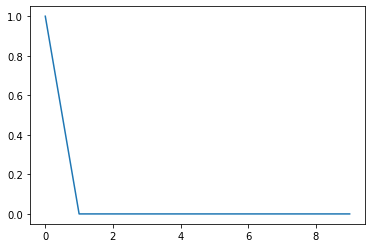

In [70]:
pca = PCA(n_components=10).fit(X)
pca_df = pd.DataFrame({"PCA" + str(i) : pca.transform(X).T[i] for i in range(10)})
print(pca_df)
plt.plot(range(10), pca.explained_variance_ratio_)
plt.show()

In [71]:
model = Logit(list(total_Y), pca_df).fit(method='bfgs')
print(model.summary())

         Current function value: 0.693147
         Iterations: 0
         Function evaluations: 15
         Gradient evaluations: 3
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 2216
Model:                          Logit   Df Residuals:                     2206
Method:                           MLE   Df Model:                            9
Date:                Mon, 22 Jan 2024   Pseudo R-squ.:                 -0.3588
Time:                        14:58:25   Log-Likelihood:                -1536.0
converged:                      False   LL-Null:                       -1130.4
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
PCA0                0   2.43e-09          0      1.000   -4.76e-09    4.76e-09

/Users/tannergiddings/opt/anaconda3/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/tannergiddings/opt/anaconda3/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Users/tannergiddings/opt/anaconda3/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/tannergiddings/opt/anaconda3/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Users/tannergiddings/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likeli

In [72]:
X['Intercept'] = [1 for i in range(len(X))]
X

Year_Birth   Income   Dt_Customer  Recency  MntWines  MntFruits  \
0             64  58138.0  1.346731e+09       58       635         88   
1             61  46344.0  1.394255e+09       38        11          1   
2             72  71613.0  1.377058e+09       26       426         49   
3             91  26646.0  1.392008e+09       26        11          4   
4             88  58293.0  1.390108e+09       94       173         43   
...          ...      ...           ...      ...       ...        ...   
2235          74  61223.0  1.371096e+09       46       709         43   
2236          53  64014.0  1.402373e+09       56       406          0   
2237          88  56981.0  1.390626e+09       91       908         48   
2238          63  69245.0  1.390540e+09        8       428         30   
2239          61  52869.0  1.350274e+09       40        84          3   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  ...  \
0                 546              172                88            88  ...   
1                   6                2                 1             6  ...   
2                 127              111                21            42  ...   
3                  20               10                 3             5  ...   
4                 118               46                27            15  ...   
...               ...              ...               ...           ...  ...   
2235              182               42               118           247  ...   
2236               30                0                 0             8  ...   
2237              217               32                12            24  ...   
2238              214               80                30            61  ...   
2239               61                2                 1            21  ...   

      Marital_Status_Together  Marital_Status_Widow  Marital_Status_YOLO  \
0                           0                     0                    0   
1                           0                     0                    0   
2                           1                     0                    0   
3                           1                     0                    0   
4                           0                     0                    0   
...                       ...                   ...                  ...   
2235                        0                     0                    0   
2236                        1                     0                    0   
2237                        0                     0                    0   
2238                        1                     0                    0   
2239                        0                     0                    0   

      Kidhome_0  Kidhome_1  Kidhome_2  Teenhome_0  Teenhome_1  Teenhome_2  \
0             1          0          0           1           0           0   
1             0          1          0           0           1           0   
2             1          0          0           1           0           0   
3             0          1          0           1           0           0   
4             0          1          0           1           0           0   
...         ...        ...        ...         ...         ...         ...   
2235          1          0          0           0           1           0   
2236          0          0          1           0           1           0   
2237          1          0          0           1           0           0   
2238          1          0          0           0           1           0   
2239          0          1          0           0           1           0   

      Intercept  
0             1  
1             1  
2             1  
3             1  
4             1  
...         ...  
2235          1  
2236          1  
2237          1  
2238          1  
2239          1  

[2216 rows x 37 columns]

In [73]:
print(X.columns)
X

Index(['Year_Birth', 'Income', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Complain', 'Response', 'Education_2n Cycle', 'Education_Basic',
       'Education_Graduation', 'Education_Master', 'Education_PhD',
       'Marital_Status_Absurd', 'Marital_Status_Alone',
       'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Together',
       'Marital_Status_Widow', 'Marital_Status_YOLO', 'Kidhome_0', 'Kidhome_1',
       'Kidhome_2', 'Teenhome_0', 'Teenhome_1', 'Teenhome_2', 'Intercept'],
      dtype='object')


Year_Birth   Income   Dt_Customer  Recency  MntWines  MntFruits  \
0             64  58138.0  1.346731e+09       58       635         88   
1             61  46344.0  1.394255e+09       38        11          1   
2             72  71613.0  1.377058e+09       26       426         49   
3             91  26646.0  1.392008e+09       26        11          4   
4             88  58293.0  1.390108e+09       94       173         43   
...          ...      ...           ...      ...       ...        ...   
2235          74  61223.0  1.371096e+09       46       709         43   
2236          53  64014.0  1.402373e+09       56       406          0   
2237          88  56981.0  1.390626e+09       91       908         48   
2238          63  69245.0  1.390540e+09        8       428         30   
2239          61  52869.0  1.350274e+09       40        84          3   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  ...  \
0                 546              172                88            88  ...   
1                   6                2                 1             6  ...   
2                 127              111                21            42  ...   
3                  20               10                 3             5  ...   
4                 118               46                27            15  ...   
...               ...              ...               ...           ...  ...   
2235              182               42               118           247  ...   
2236               30                0                 0             8  ...   
2237              217               32                12            24  ...   
2238              214               80                30            61  ...   
2239               61                2                 1            21  ...   

      Marital_Status_Together  Marital_Status_Widow  Marital_Status_YOLO  \
0                           0                     0                    0   
1                           0                     0                    0   
2                           1                     0                    0   
3                           1                     0                    0   
4                           0                     0                    0   
...                       ...                   ...                  ...   
2235                        0                     0                    0   
2236                        1                     0                    0   
2237                        0                     0                    0   
2238                        1                     0                    0   
2239                        0                     0                    0   

      Kidhome_0  Kidhome_1  Kidhome_2  Teenhome_0  Teenhome_1  Teenhome_2  \
0             1          0          0           1           0           0   
1             0          1          0           0           1           0   
2             1          0          0           1           0           0   
3             0          1          0           1           0           0   
4             0          1          0           1           0           0   
...         ...        ...        ...         ...         ...         ...   
2235          1          0          0           0           1           0   
2236          0          0          1           0           1           0   
2237          1          0          0           1           0           0   
2238          1          0          0           0           1           0   
2239          0          1          0           0           1           0   

      Intercept  
0             1  
1             1  
2             1  
3             1  
4             1  
...         ...  
2235          1  
2236          1  
2237          1  
2238          1  
2239          1  

[2216 rows x 37 columns]

In [74]:
import scipy.stats as stats
from math import sqrt, exp, log
categorical_variables = ['Education', 'Marital_Status', 'Kidhome', 'Teenhome']

def odds_ratio_statistic(ct):
    nd0 = sum(ct[0])
    nd1 = sum(ct[1])
    n0d = ct[0][0] + ct[1][0]
    n1d = ct[0][1] + ct[1][1]
    n = nd0 + nd1
    return n * (ct[0][0] * ct[1][1] - ct[0][1] * ct[1][0]) ** 2 / (nd0 * nd1 * n0d * n1d)

def or_p(ct_stat):
    return 1 - stats.chi2.cdf(ct_stat, 1)

def calculate_odds_ratio(ct):
    return ct[0][0] * ct[1][1] / (ct[0][1] * ct[1][0])

def calculate_interval(ct, or_est):
    E = 1.96 * sqrt(1/ct[0][0] + 1/ct[0][1] + 1/ct[1][0] + 1/ct[1][1])
    return exp(log(or_est) - E), exp(log(or_est) + E)

def odds_ratio_test(data, X, Y):
    L = []
    ct = pd.crosstab(data[X], data[Y])
    res = odds_ratio(ct.to_numpy().T)
    return res.confidence_interval(confidence_level=0.95), res.statistic
ct = pd.crosstab(X['Kidhome_1'], Y['AcceptedCmp1'])
print(ct)

print(or_p(odds_ratio_statistic(ct.to_numpy().T)))
or_est = calculate_odds_ratio(ct.to_numpy().T)
print(or_est, calculate_interval(ct.to_numpy().T, or_est))

AcceptedCmp1     0    1
Kidhome_1              
0             1195  134
1              879    8
0.0
0.08116414514458424 (0.03956031154963305, 0.16652089427521816)


In [75]:
X = X.reset_index(drop=True)
Y = Y.reset_index(drop=True)

from random import shuffle
def simulation_gen(X, Y):
    indices = [i for i in range(len(X))]
    shuffle(indices)
    for i in range(len(indices)):
        yield X[i], Y[i]
        
gen = simulation_gen(X['Kidhome_1'], Y['AcceptedCmp1'])

OR = [[0,0], [0,0]]
estimates = []
LB = []
UB = []

for i in range(len(X)):
    x, y = next(gen)
    OR[x][y] += 1
    try:
        or_est = calculate_odds_ratio(OR)
        lb, ub = calculate_interval(OR, or_est)
        estimates.append(or_est)
        LB.append(lb)
        UB.append(ub)
        print(OR)
    except ZeroDivisionError:
        continue

[[131, 12], [92, 1]]
[[132, 12], [92, 1]]
[[133, 12], [92, 1]]
[[134, 12], [92, 1]]
[[134, 12], [93, 1]]
[[134, 12], [94, 1]]
[[134, 13], [94, 1]]
[[135, 13], [94, 1]]
[[135, 13], [95, 1]]
[[135, 13], [96, 1]]
[[136, 13], [96, 1]]
[[137, 13], [96, 1]]
[[137, 13], [97, 1]]
[[138, 13], [97, 1]]
[[138, 13], [98, 1]]
[[139, 13], [98, 1]]
[[139, 13], [99, 1]]
[[139, 13], [100, 1]]
[[139, 13], [101, 1]]
[[139, 13], [102, 1]]
[[140, 13], [102, 1]]
[[140, 13], [103, 1]]
[[141, 13], [103, 1]]
[[141, 13], [104, 1]]
[[142, 13], [104, 1]]
[[142, 13], [105, 1]]
[[143, 13], [105, 1]]
[[143, 13], [106, 1]]
[[143, 13], [107, 1]]
[[144, 13], [107, 1]]
[[145, 13], [107, 1]]
[[146, 13], [107, 1]]
[[146, 14], [107, 1]]
[[147, 14], [107, 1]]
[[147, 14], [108, 1]]
[[148, 14], [108, 1]]
[[149, 14], [108, 1]]
[[150, 14], [108, 1]]
[[150, 14], [109, 1]]
[[150, 14], [110, 1]]
[[151, 14], [110, 1]]
[[151, 14], [111, 1]]
[[152, 14], [111, 1]]
[[153, 14], [111, 1]]
[[154, 14], [111, 1]]
[[154, 14], [112, 1]]
[[155

[[957, 103], [703, 7]]
[[957, 103], [704, 7]]
[[957, 103], [705, 7]]
[[958, 103], [705, 7]]
[[958, 103], [706, 7]]
[[958, 103], [707, 7]]
[[959, 103], [707, 7]]
[[959, 103], [708, 7]]
[[959, 103], [709, 7]]
[[959, 103], [710, 7]]
[[960, 103], [710, 7]]
[[960, 103], [711, 7]]
[[960, 104], [711, 7]]
[[960, 104], [712, 7]]
[[961, 104], [712, 7]]
[[962, 104], [712, 7]]
[[962, 104], [713, 7]]
[[962, 104], [714, 7]]
[[962, 104], [715, 7]]
[[963, 104], [715, 7]]
[[964, 104], [715, 7]]
[[964, 104], [716, 7]]
[[965, 104], [716, 7]]
[[966, 104], [716, 7]]
[[966, 104], [717, 7]]
[[967, 104], [717, 7]]
[[967, 105], [717, 7]]
[[967, 106], [717, 7]]
[[968, 106], [717, 7]]
[[968, 106], [718, 7]]
[[969, 106], [718, 7]]
[[970, 106], [718, 7]]
[[971, 106], [718, 7]]
[[971, 106], [719, 7]]
[[971, 107], [719, 7]]
[[971, 107], [720, 7]]
[[971, 107], [721, 7]]
[[972, 107], [721, 7]]
[[973, 107], [721, 7]]
[[973, 107], [722, 7]]
[[974, 107], [722, 7]]
[[975, 107], [722, 7]]
[[976, 107], [722, 7]]
[[976, 107]

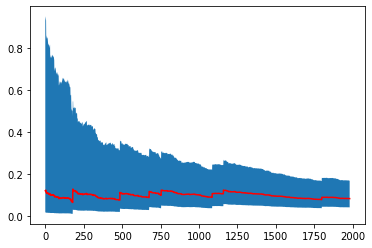

In [76]:
plt.fill_between(range(len(estimates)), LB, UB)
plt.plot(range(len(estimates)), estimates, color='red')

In [77]:
print(list(X.columns))

['Year_Birth', 'Income', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'Response', 'Education_2n Cycle', 'Education_Basic', 'Education_Graduation', 'Education_Master', 'Education_PhD', 'Marital_Status_Absurd', 'Marital_Status_Alone', 'Marital_Status_Divorced', 'Marital_Status_Married', 'Marital_Status_Single', 'Marital_Status_Together', 'Marital_Status_Widow', 'Marital_Status_YOLO', 'Kidhome_0', 'Kidhome_1', 'Kidhome_2', 'Teenhome_0', 'Teenhome_1', 'Teenhome_2', 'Intercept']


In [92]:
columns_to_analyze = ['Education_2n Cycle', 'Education_Basic', 'Education_Graduation',
                      'Education_Master', 'Education_PhD', 'Marital_Status_Absurd', 'Marital_Status_Alone',
                      'Marital_Status_Divorced', 'Marital_Status_Married', 'Marital_Status_Single',
                      'Marital_Status_Together', 'Marital_Status_Widow', 'Marital_Status_YOLO', 'Kidhome_0',
                      'Kidhome_1', 'Kidhome_2', 'Teenhome_0', 'Teenhome_1', 'Teenhome_2']
print(len(columns_to_analyze))

19


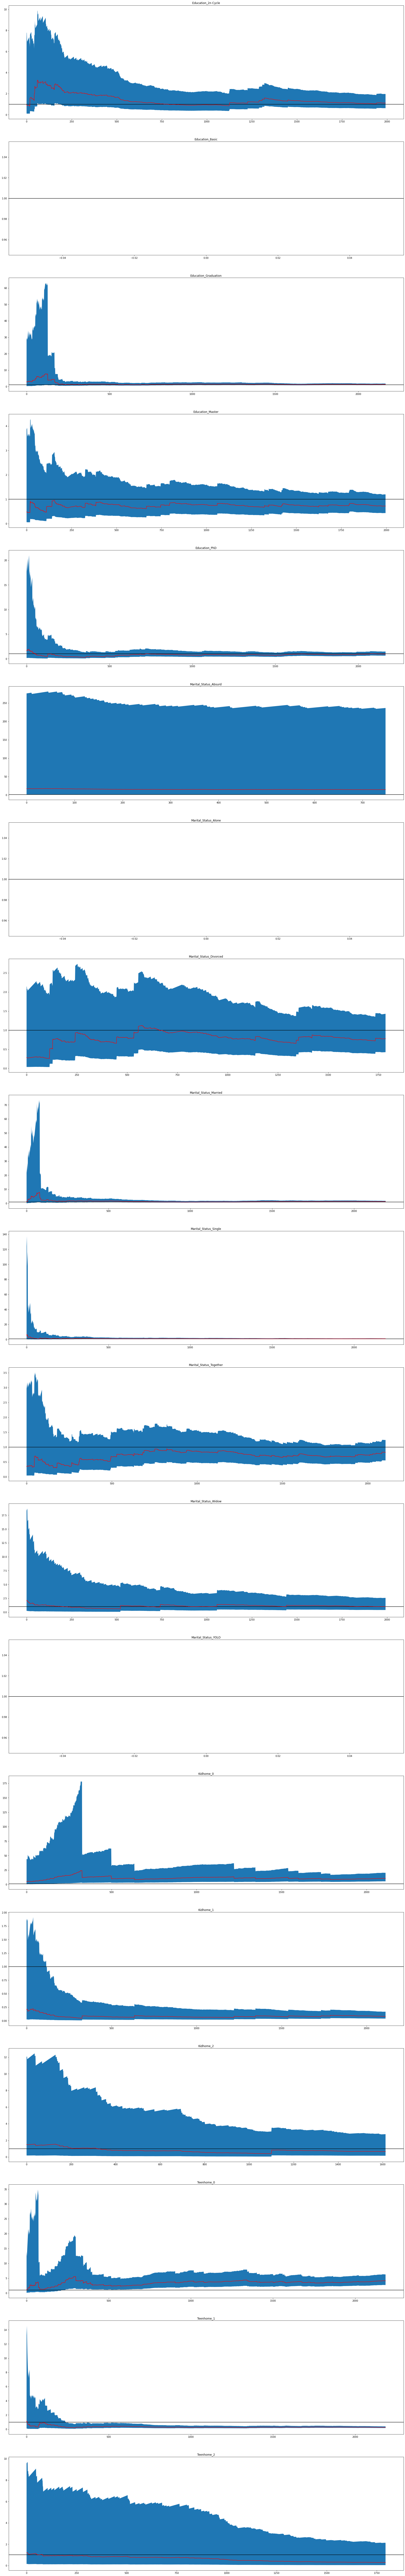

In [108]:
fig, axs = plt.subplots(19, figsize = (30, 200))

def run_analysis(X, Y):
    OR = [[0,0], [0,0]]
    estimates = []
    LB = []
    UB = []
    for elem in indices:
        x = X[elem]
        y = Y[elem]
        OR[x][y] += 1
        try:
            or_est = calculate_odds_ratio(OR)
            lb, ub = calculate_interval(OR, or_est)
            estimates.append(or_est)
            LB.append(lb)
            UB.append(ub)
        except ZeroDivisionError:
            continue
    return estimates, LB, UB

indices = list(range(len(X)))
shuffle(indices)
counter = 0
for column in columns_to_analyze:
    estimates, LB, UB = run_analysis(X[column], Y['AcceptedCmp1'])
    axs[counter].fill_between(range(len(estimates)), LB, UB)
    axs[counter].axhline(1, color='black')
    axs[counter].plot(range(len(estimates)), estimates, color='red')
    axs[counter].set_title(column)
    counter += 1

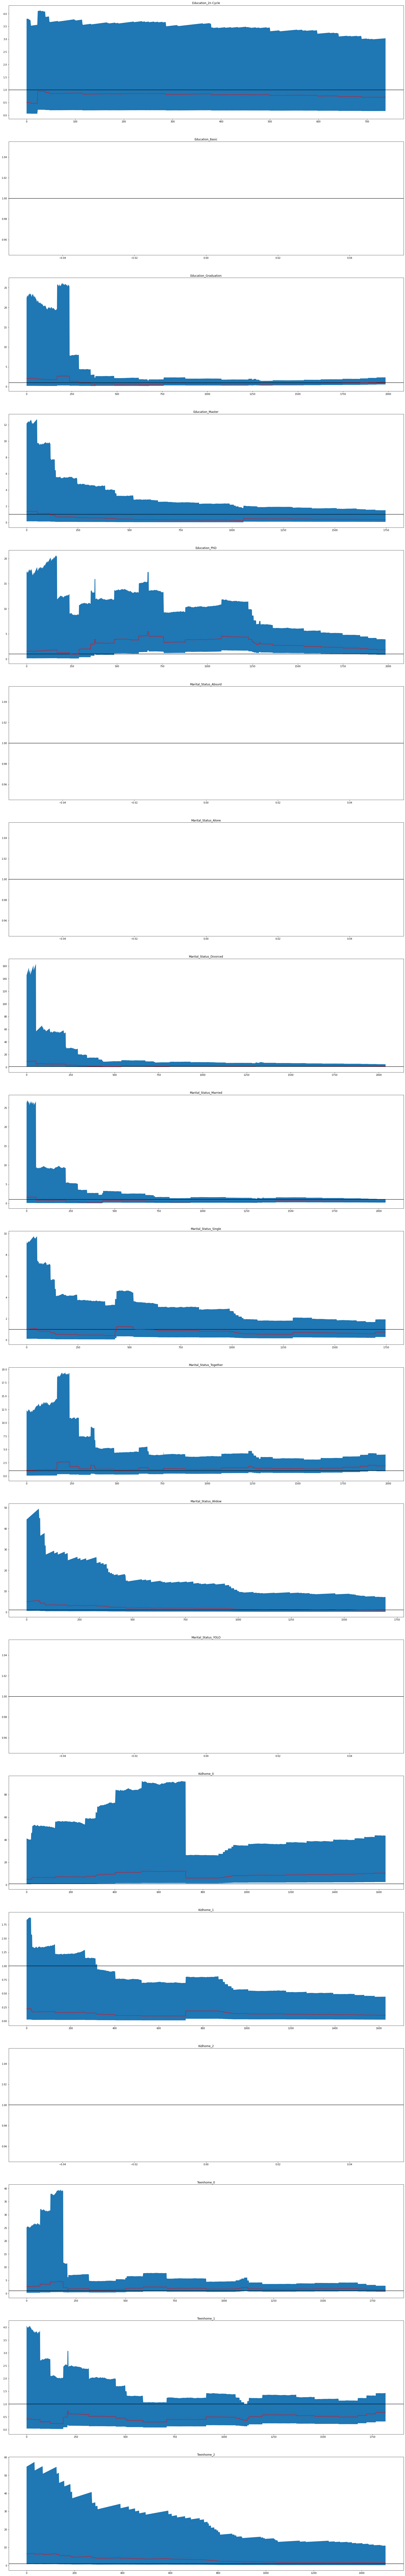

In [99]:
fig, axs = plt.subplots(19, figsize = (30, 200))

def run_analysis(X, Y):
    OR = [[0,0], [0,0]]
    estimates = []
    LB = []
    UB = []
    for elem in indices:
        x = X[elem]
        y = Y[elem]
        OR[x][y] += 1
        try:
            or_est = calculate_odds_ratio(OR)
            lb, ub = calculate_interval(OR, or_est)
            estimates.append(or_est)
            LB.append(lb)
            UB.append(ub)
        except ZeroDivisionError:
            continue
    return estimates, LB, UB

indices = list(range(len(X)))
shuffle(indices)
counter = 0
for column in columns_to_analyze:
    estimates, LB, UB = run_analysis(X[column], Y['AcceptedCmp2'])
    axs[counter].fill_between(range(len(estimates)), LB, UB)
    axs[counter].axhline(1, color='black')
    axs[counter].plot(range(len(estimates)), estimates, color='red')
    axs[counter].set_title(column)
    counter += 1

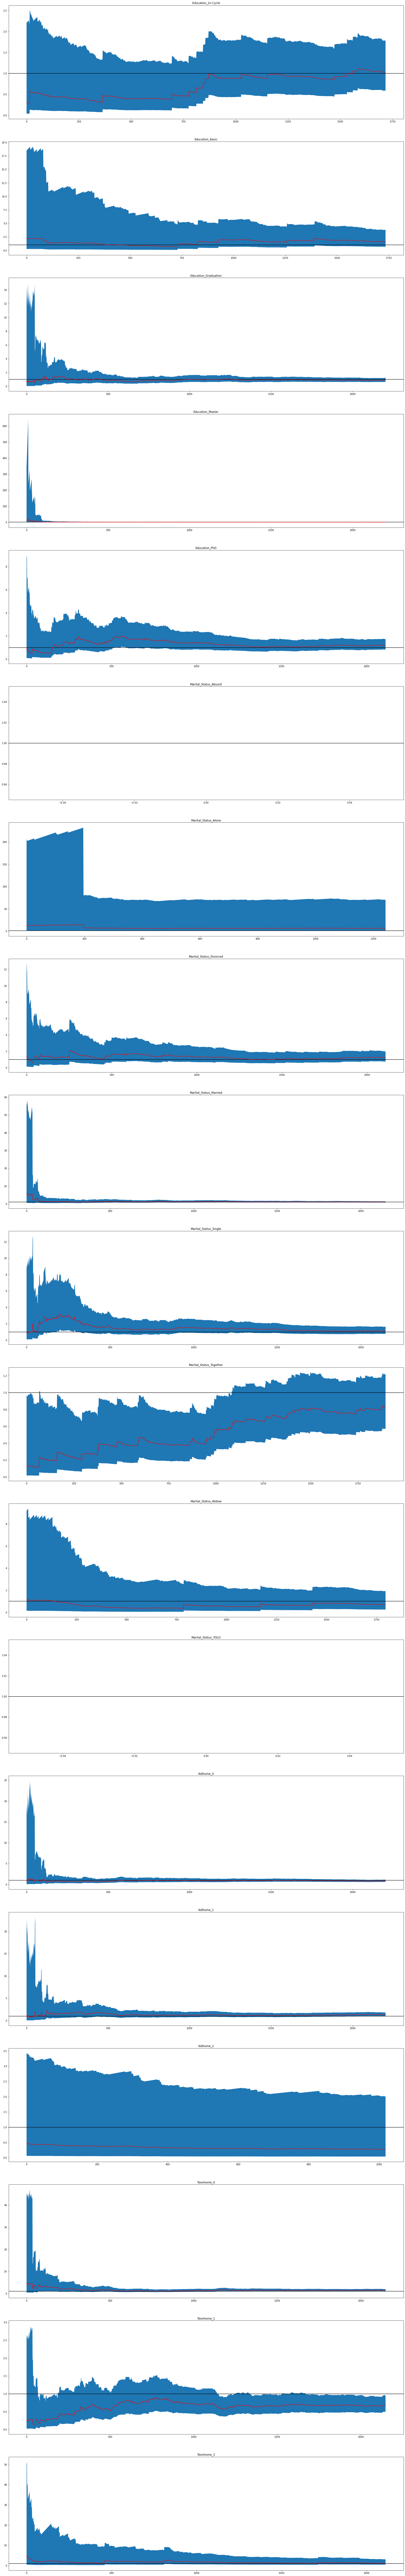

In [103]:
fig, axs = plt.subplots(19, figsize = (30, 200))

def run_analysis(X, Y):
    OR = [[0,0], [0,0]]
    estimates = []
    LB = []
    UB = []
    for elem in indices:
        x = X[elem]
        y = Y[elem]
        OR[x][y] += 1
        try:
            or_est = calculate_odds_ratio(OR)
            lb, ub = calculate_interval(OR, or_est)
            estimates.append(or_est)
            LB.append(lb)
            UB.append(ub)
        except ZeroDivisionError:
            continue
    return estimates, LB, UB

indices = list(range(len(X)))
shuffle(indices)
counter = 0
for column in columns_to_analyze:
    estimates, LB, UB = run_analysis(X[column], Y['AcceptedCmp2'])
    axs[counter].fill_between(range(len(estimates)), LB, UB)
    axs[counter].axhline(1, color='black')
    axs[counter].plot(range(len(estimates)), estimates, color='red')
    axs[counter].set_title(column)
    counter += 1

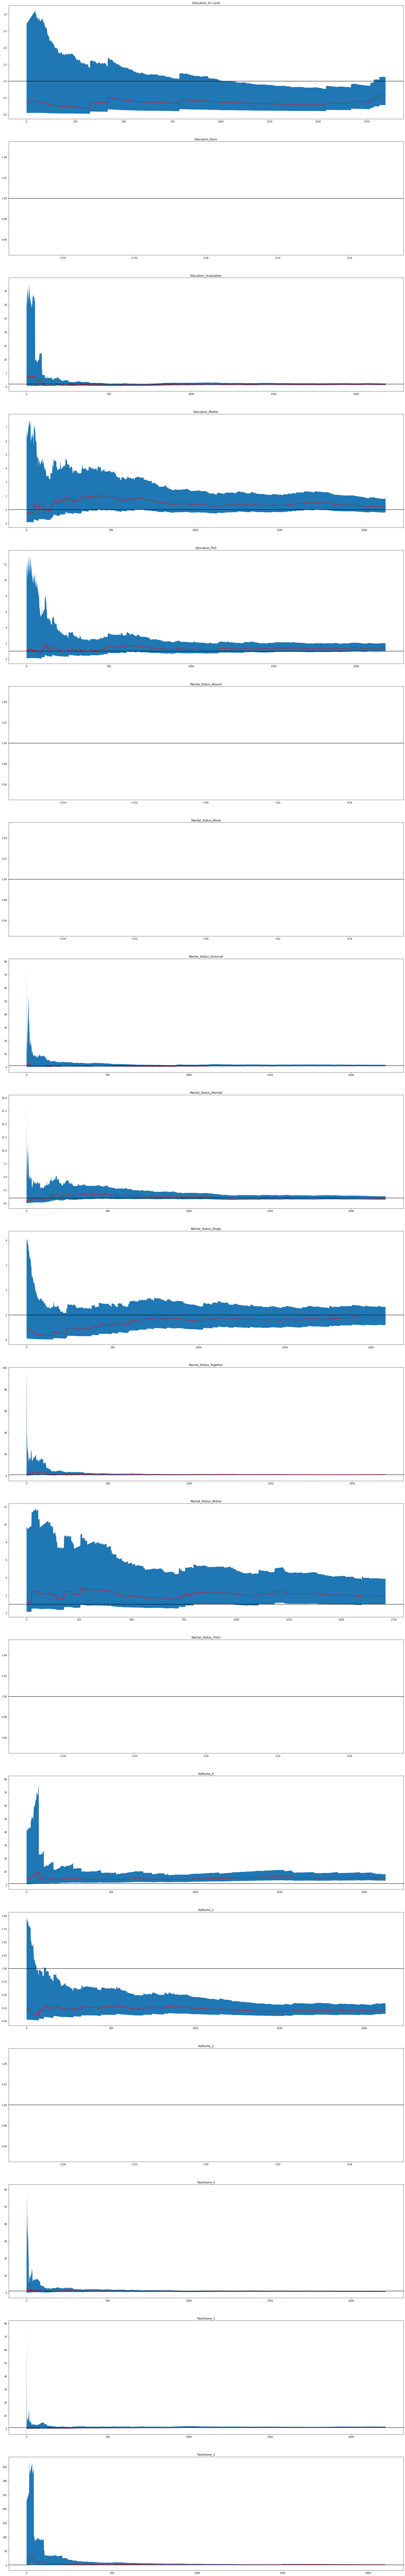

In [104]:
fig, axs = plt.subplots(19, figsize = (30, 200))

def run_analysis(X, Y):
    OR = [[0,0], [0,0]]
    estimates = []
    LB = []
    UB = []
    for elem in indices:
        x = X[elem]
        y = Y[elem]
        OR[x][y] += 1
        try:
            or_est = calculate_odds_ratio(OR)
            lb, ub = calculate_interval(OR, or_est)
            estimates.append(or_est)
            LB.append(lb)
            UB.append(ub)
        except ZeroDivisionError:
            continue
    return estimates, LB, UB

indices = list(range(len(X)))
shuffle(indices)
counter = 0
for column in columns_to_analyze:
    estimates, LB, UB = run_analysis(X[column], Y['AcceptedCmp2'])
    axs[counter].fill_between(range(len(estimates)), LB, UB)
    axs[counter].axhline(1, color='black')
    axs[counter].plot(range(len(estimates)), estimates, color='red')
    axs[counter].set_title(column)
    counter += 1

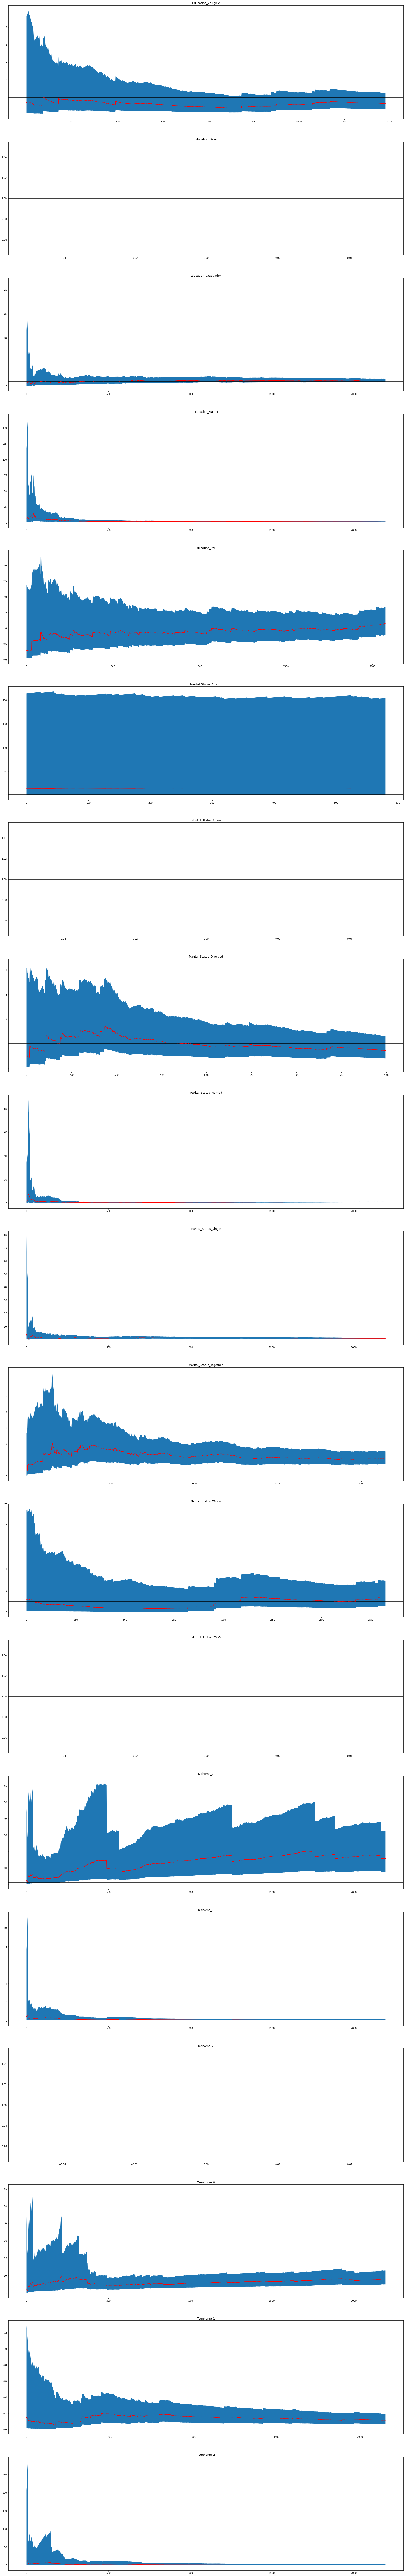

In [105]:
fig, axs = plt.subplots(19, figsize = (30, 200))

def run_analysis(X, Y):
    OR = [[0,0], [0,0]]
    estimates = []
    LB = []
    UB = []
    for elem in indices:
        x = X[elem]
        y = Y[elem]
        OR[x][y] += 1
        try:
            or_est = calculate_odds_ratio(OR)
            lb, ub = calculate_interval(OR, or_est)
            estimates.append(or_est)
            LB.append(lb)
            UB.append(ub)
        except ZeroDivisionError:
            continue
    return estimates, LB, UB

indices = list(range(len(X)))
shuffle(indices)
counter = 0
for column in columns_to_analyze:
    estimates, LB, UB = run_analysis(X[column], Y['AcceptedCmp5'])
    axs[counter].fill_between(range(len(estimates)), LB, UB)
    axs[counter].axhline(1, color='black')
    axs[counter].plot(range(len(estimates)), estimates, color='red')
    axs[counter].set_title(column)
    counter += 1

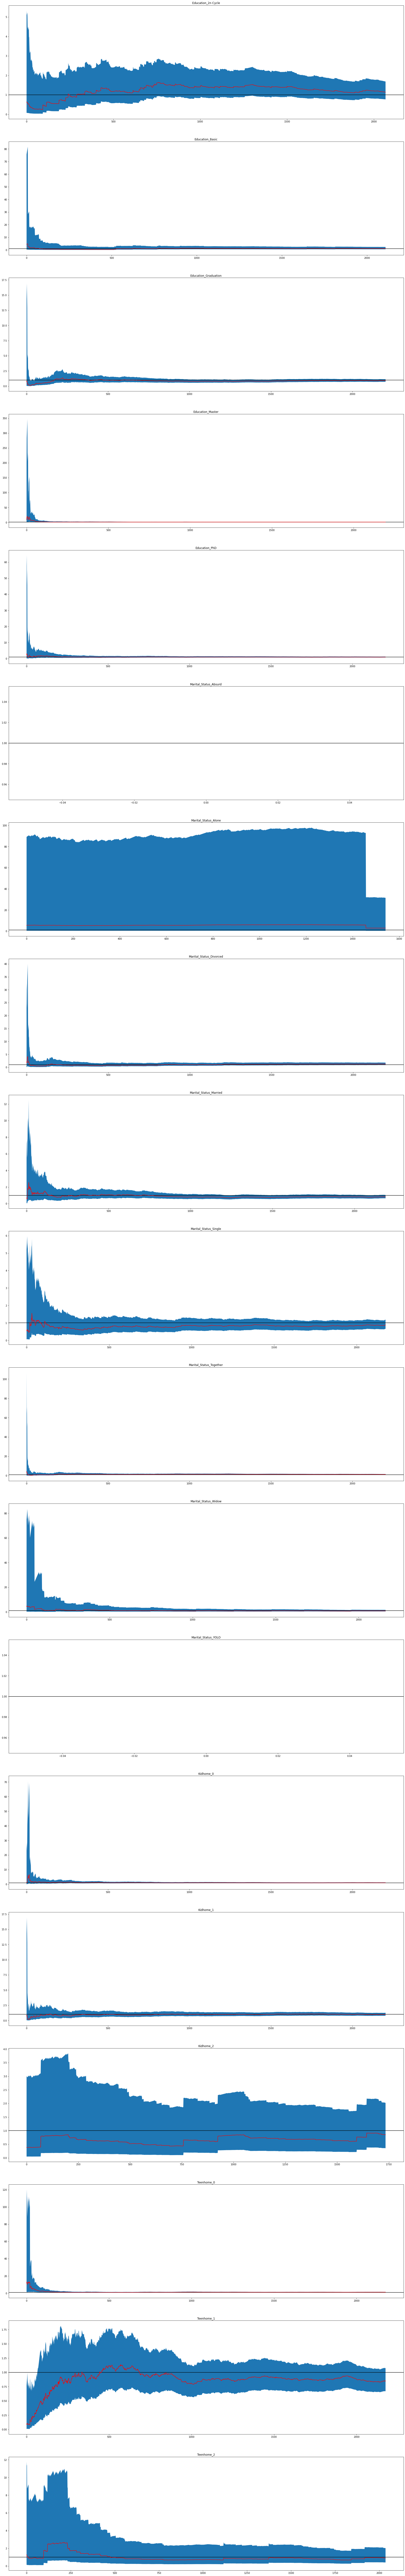

In [106]:
fig, axs = plt.subplots(19, figsize = (30, 200))

def run_analysis(X, Y):
    OR = [[0,0], [0,0]]
    estimates = []
    LB = []
    UB = []
    for elem in indices:
        x = X[elem]
        y = Y[elem]
        OR[x][y] += 1
        try:
            or_est = calculate_odds_ratio(OR)
            lb, ub = calculate_interval(OR, or_est)
            estimates.append(or_est)
            LB.append(lb)
            UB.append(ub)
        except ZeroDivisionError:
            continue
    return estimates, LB, UB

indices = list(range(len(X)))
shuffle(indices)
counter = 0
for column in columns_to_analyze:
    estimates, LB, UB = run_analysis(X[column], data['Response'])
    axs[counter].fill_between(range(len(estimates)), LB, UB)
    axs[counter].axhline(1, color='black')
    axs[counter].plot(range(len(estimates)), estimates, color='red')
    axs[counter].set_title(column)
    counter += 1